In [1]:
# 1. Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Cargar el dataset
data = pd.read_csv('/content/parkinsons.data')  # Asegúrate de subir el archivo a Colab

# 3. Vista general del dataset
print("Forma del dataset:", data.shape)
print("\nColumnas:", data.columns.tolist())

# 4. Primeras filas
data.head()


Forma del dataset: (195, 24)

Columnas: ['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [2]:
# 1. Verificar tipos de datos y nulos
data.info()
print("\nValores nulos por columna:\n", data.isnull().sum())

# 2. Eliminar columna 'name' (no aporta al modelo)
data = data.drop(columns='name')

# 3. Ver distribución de la variable objetivo
print("\nDistribución de 'status':\n", data['status'].value_counts())

# 4. Estadísticas descriptivas
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


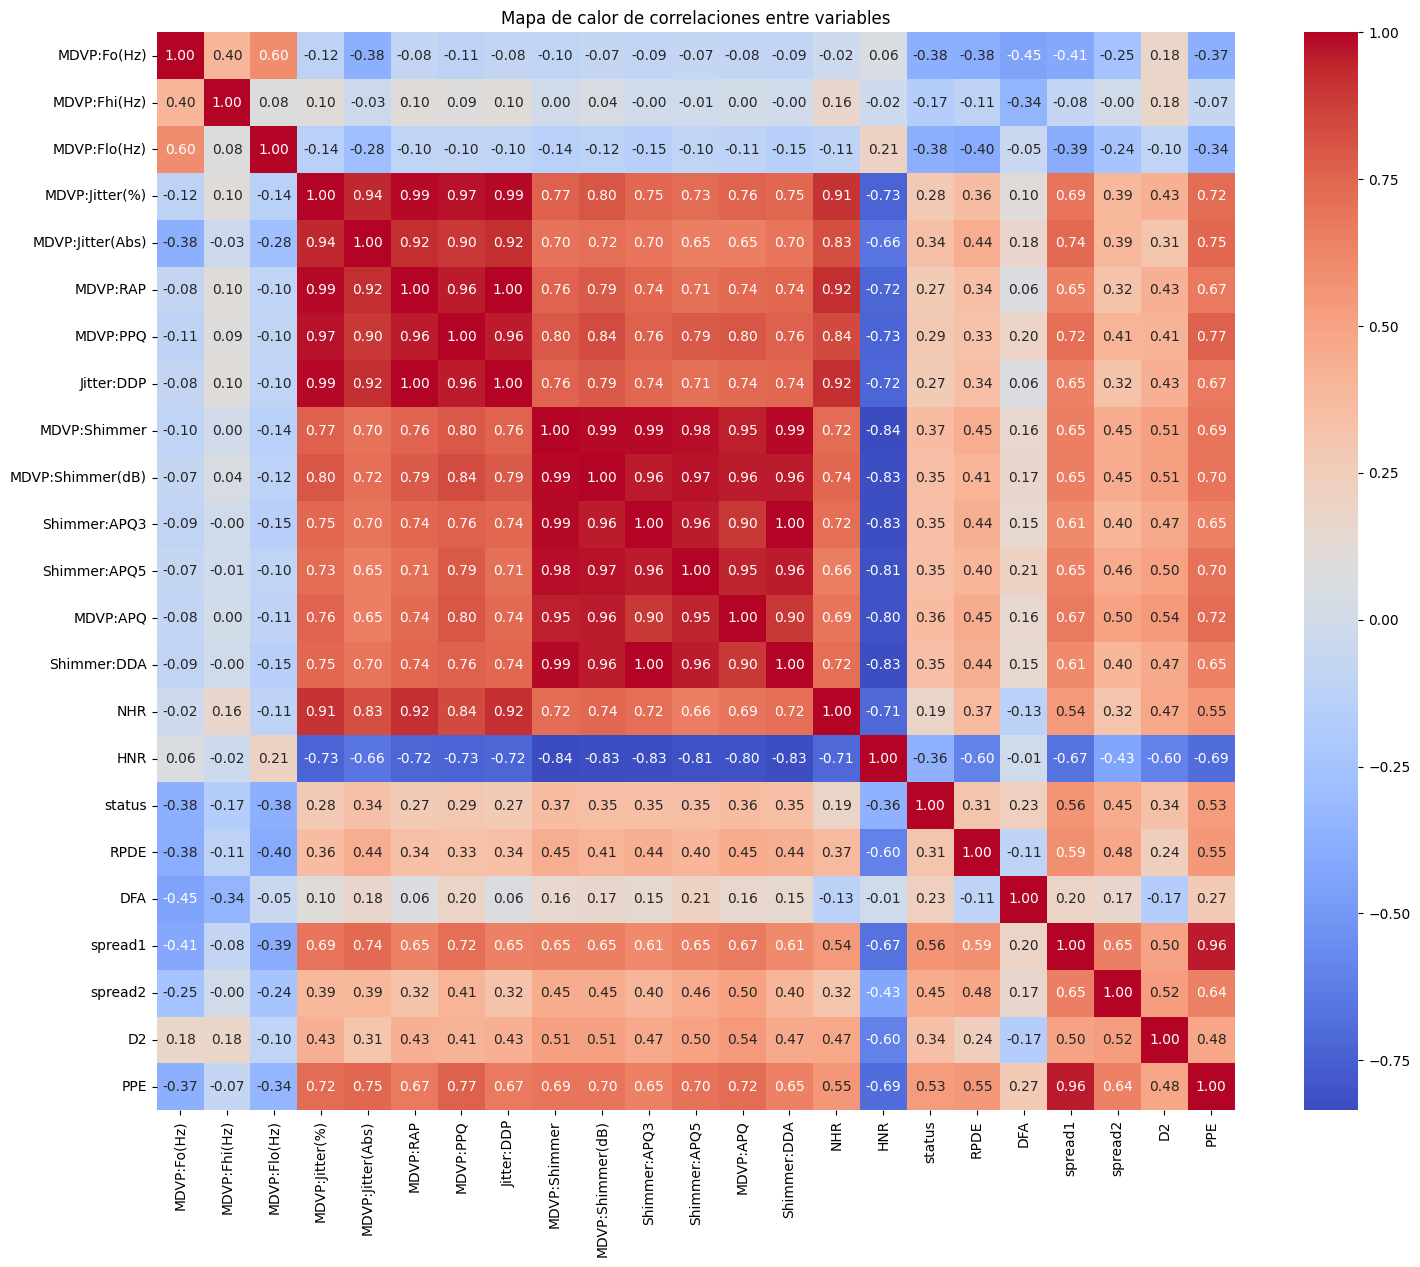

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# 5.1 Correlación entre variables (heatmap)
plt.figure(figsize=(18,14))
correlation = data.corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Mapa de calor de correlaciones entre variables")
plt.show()



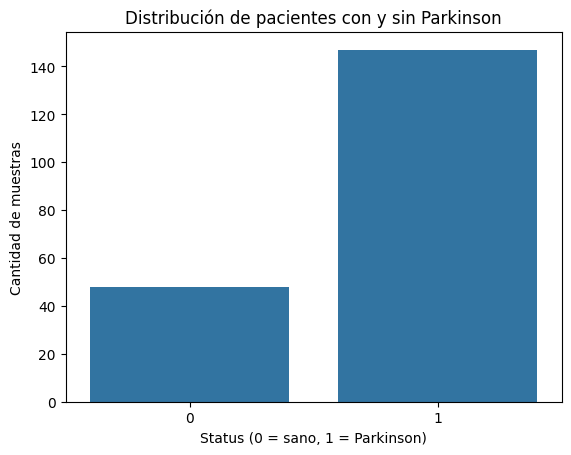

In [5]:
# 5.2 Distribución de la variable objetivo
sns.countplot(data=data, x='status')
plt.title("Distribución de pacientes con y sin Parkinson")
plt.xlabel("Status (0 = sano, 1 = Parkinson)")
plt.ylabel("Cantidad de muestras")
plt.show()



In [ ]:
# 1. Importar librerías necesarias
import numpy as np
import pandas as pd

# 2. Calcular la matriz de correlación
correlaciones = data.corr(numeric_only=True)

# 3. Extraer correlación con la variable objetivo 'status'
correlacion_status = correlaciones['status'].drop('status')

# 4. Ordenar por valor absoluto de correlación
correlacion_ordenada = correlacion_status.reindex(correlacion_status.abs().sort_values(ascending=False).index)

# 5. Mostrar resultados con explicación
print("🔎 Variables más correlacionadas con 'status':\n")
for var, val in correlacion_ordenada.items():
    direccion = "positiva" if val > 0 else "negativa"
    intensidad = abs(val)

    if intensidad >= 0.5:
        fuerza = "alta"
    elif intensidad >= 0.3:
        fuerza = "moderada"
    elif intensidad >= 0.1:
        fuerza = "baja"
    else:
        fuerza = "muy baja"

    print(f"- {var}: correlación {direccion} de {fuerza} ({val:.3f})")


🔎 Variables más correlacionadas con 'status':

- spread1: correlación positiva de alta (0.565)
- PPE: correlación positiva de alta (0.531)
- spread2: correlación positiva de moderada (0.455)
- MDVP:Fo(Hz): correlación negativa de moderada (-0.384)
- MDVP:Flo(Hz): correlación negativa de moderada (-0.380)
- MDVP:Shimmer: correlación positiva de moderada (0.367)
- MDVP:APQ: correlación positiva de moderada (0.364)
- HNR: correlación negativa de moderada (-0.362)
- Shimmer:APQ5: correlación positiva de moderada (0.351)
- MDVP:Shimmer(dB): correlación positiva de moderada (0.351)
- Shimmer:APQ3: correlación positiva de moderada (0.348)
- Shimmer:DDA: correlación positiva de moderada (0.348)
- D2: correlación positiva de moderada (0.340)
- MDVP:Jitter(Abs): correlación positiva de moderada (0.339)
- RPDE: correlación positiva de moderada (0.309)
- MDVP:PPQ: correlación positiva de baja (0.289)
- MDVP:Jitter(%): correlación positiva de baja (0.278)
- MDVP:RAP: correlación positiva de baja (0

ESCOGE DE VARIABLES X E Y  


In [ ]:
import pandas as pd
from IPython.display import display


# Seleccionar solo columnas numéricas
numeric_cols = data.select_dtypes(include='number').columns.tolist()

# 1) Correlación de todas las variables con 'status'
corrs_all = data[numeric_cols].corr()[['status']].drop(index=['status'])
corrs_all = corrs_all.rename(columns={'status': 'Correlation_with_status'})
corrs_all = corrs_all.sort_values(by='Correlation_with_status', key=lambda x: x.abs(), ascending=False)
corrs_all = corrs_all.reset_index().rename(columns={'index':'Feature'})

# 2) Rangos (min, max) de todas las variables
ranges_all = data[numeric_cols].agg(['min','max']).T.reset_index().rename(columns={'index':'Feature'})

# 3) Descripción por grupo para todas las variables
desc_by_status_all = data.groupby('status')[numeric_cols].describe().stack(level=0)
desc_by_status_all = desc_by_status_all.reset_index().rename(columns={'level_1':'Statistic'})

# Mostrar resultados
display(corrs_all)
display(ranges_all)
display(desc_by_status_all)

/tmp/ipython-input-7-4098033341.py:18: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  desc_by_status_all = data.groupby('status')[numeric_cols].describe().stack(level=0)


,Feature,Correlation_with_status
0,spread1,0.564838
1,PPE,0.531039
2,spread2,0.454842
3,MDVP:Fo(Hz),-0.383535
4,MDVP:Flo(Hz),-0.380200
5,MDVP:Shimmer,0.367430
6,MDVP:APQ,0.364316
7,HNR,-0.361515
8,Shimmer:APQ5,0.351148
9,MDVP:Shimmer(dB),0.350697


,Feature,min,max
0,MDVP:Fo(Hz),88.333000,260.105000
1,MDVP:Fhi(Hz),102.145000,592.030000
2,MDVP:Flo(Hz),65.476000,239.170000
3,MDVP:Jitter(%),0.001680,0.033160
4,MDVP:Jitter(Abs),0.000007,0.000260
5,MDVP:RAP,0.000680,0.021440
6,MDVP:PPQ,0.000920,0.019580
7,Jitter:DDP,0.002040,0.064330
8,MDVP:Shimmer,0.009540,0.119080
9,MDVP:Shimmer(dB),0.085000,1.302000


,status,Statistic,count,mean,std,min,25%,50%,75%,max
0,0,D2,48.0,2.154491,0.310269,1.423287,1.974217,2.129510,2.339487,2.882450
1,0,DFA,48.0,0.695716,0.051346,0.626710,0.654291,0.682527,0.742284,0.785714
2,0,HNR,48.0,24.678750,3.434540,17.883000,22.993250,24.997000,26.139250,33.047000
3,0,Jitter:DDP,48.0,0.005776,0.003199,0.002760,0.003998,0.004875,0.005725,0.018730
4,0,MDVP:APQ,48.0,0.013305,0.003825,0.007190,0.011235,0.013015,0.015945,0.027450
5,0,MDVP:Fhi(Hz),48.0,223.636750,96.727067,113.597000,139.413250,231.161500,251.239250,592.030000
6,0,MDVP:Flo(Hz),48.0,145.207292,58.757070,74.287000,98.243750,113.938500,199.183000,239.170000
7,0,MDVP:Fo(Hz),48.0,181.937771,52.731067,110.739000,120.947500,198.996000,229.077000,260.105000
8,0,MDVP:Jitter(%),48.0,0.003866,0.002055,0.001780,0.002655,0.003355,0.004530,0.013600
9,0,MDVP:Jitter(Abs),48.0,0.000023,0.000015,0.000007,0.000010,0.000025,0.000030,0.000080


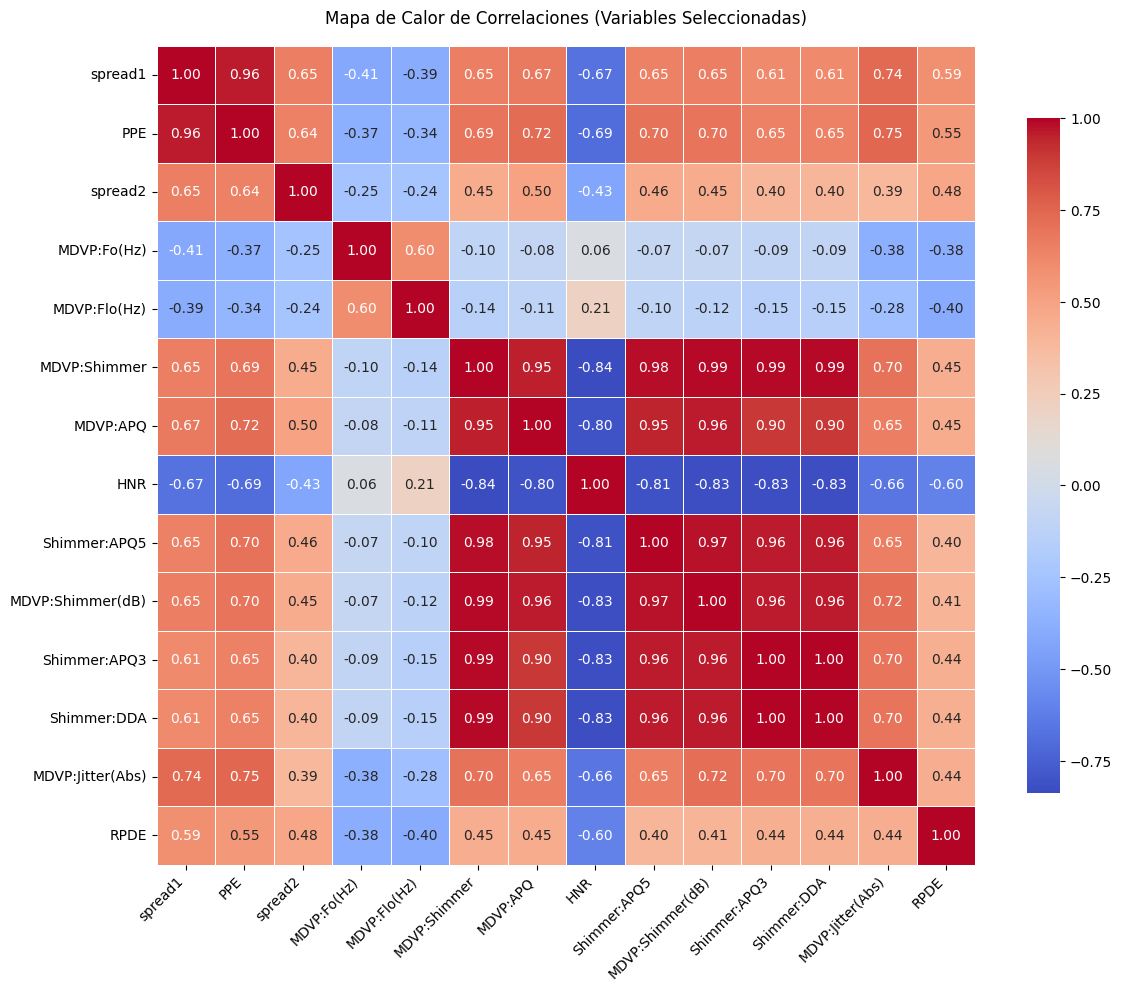

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista concreta de variables
vars_sel = [
    'spread1', 'PPE', 'spread2', 'MDVP:Fo(Hz)', 'MDVP:Flo(Hz)',
    'MDVP:Shimmer', 'MDVP:APQ', 'HNR', 'Shimmer:APQ5', 'MDVP:Shimmer(dB)',
    'Shimmer:APQ3', 'Shimmer:DDA', 'MDVP:Jitter(Abs)', 'RPDE'
]

# Calcula la matriz de correlación solo de esas columnas
corr_sel = data[vars_sel].corr()

# Dibuja el heatmap
plt.figure(figsize=(12,10))
sns.heatmap(
    corr_sel,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    cbar_kws={"shrink": .8},
    linewidths=.5
)
plt.title("Mapa de Calor de Correlaciones (Variables Seleccionadas)", pad=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    matthews_corrcoef, confusion_matrix, classification_report,
    ConfusionMatrixDisplay, roc_auc_score
)
from statsmodels.stats.contingency_tables import mcnemar

# — Carga tu DataFrame —
# data = pd.read_csv('tu_archivo.csv')


In [22]:
# Variables predictoras y target
X = data[[
    'spread1', 'PPE', 'spread2', 'MDVP:Fo(Hz)', 'MDVP:Flo(Hz)',
    'MDVP:Shimmer', 'MDVP:APQ', 'HNR', 'Shimmer:APQ5',
    'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:DDA',
    'MDVP:Jitter(Abs)', 'RPDE'
]]
Y = data['status']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)


In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# (Opcional) Guarda el scaler
# joblib.dump(scaler, 'scaler.pkl')


In [30]:
# Definición de los modelos
modelos = {
    "SVM (Lineal)"        : SVC(kernel='linear', probability=True),
    "Random Forest"       : RandomForestClassifier(),
    "Regresión Logística" : LogisticRegression(max_iter=1000),
    "KNN "           : KNeighborsClassifier(n_neighbors=3)
}

predicciones = {}
resultados = []

for nombre, modelo in modelos.items():
    modelo.fit(X_train_scaled, y_train)
    y_pred = modelo.predict(X_test_scaled)
    predicciones[nombre] = y_pred

    # Cálculo de métricas
    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec  = recall_score(y_test, y_pred)
    f1   = f1_score(y_test, y_pred)
    mcc  = matthews_corrcoef(y_test, y_pred)

    resultados.append({
        "Modelo":    nombre,
        "Accuracy":  acc,
        "Precision": prec,
        "Recall":    rec,
        "F1":        f1,
        "MCC":       mcc
    })

# DataFrame resumen
df_res = pd.DataFrame(resultados)[
    ["Modelo", "Accuracy", "Precision", "Recall", "F1", "MCC"]
].round(3)

display(df_res)




,Modelo,Accuracy,Precision,Recall,F1,MCC
0,SVM (Lineal),0.872,0.909,0.938,0.923,0.541
1,Random Forest,0.897,0.938,0.938,0.938,0.652
2,Regresión Logística,0.923,0.914,1.000,0.955,0.723
3,KNN,0.949,0.969,0.969,0.969,0.826


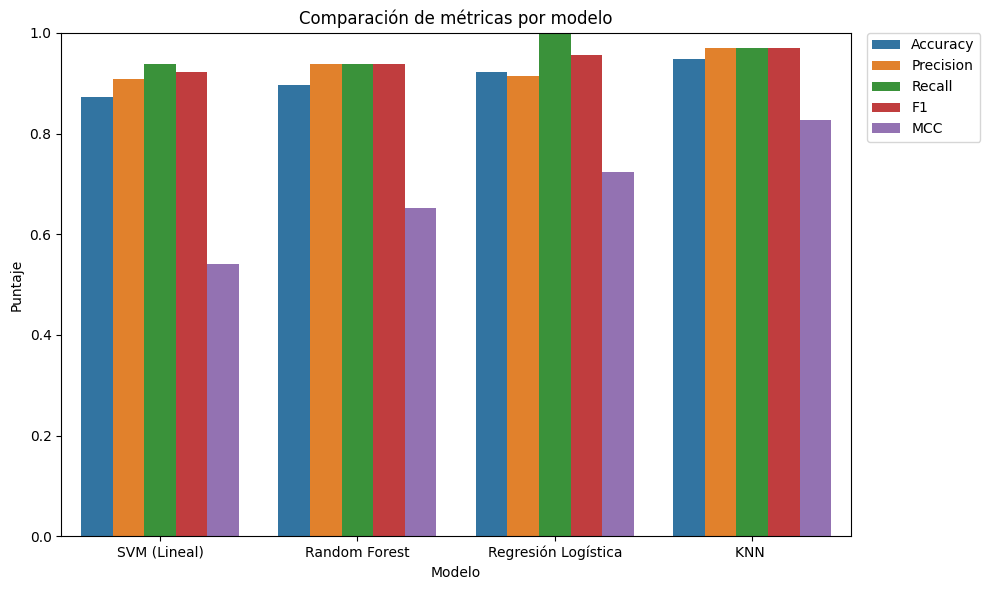

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Melt para pasar de ancho a largo
df_melt = df_res.melt(
    id_vars='Modelo',
    value_vars=['Accuracy','Precision','Recall','F1','MCC'],
    var_name='Métrica',
    value_name='Valor'
)

# 2) Barplot con hue por métrica
plt.figure(figsize=(10,6))
sns.barplot(
    data=df_melt,
    x='Modelo',
    y='Valor',
    hue='Métrica'
)
plt.ylim(0,1)
plt.title("Comparación de métricas por modelo")
plt.ylabel("Puntaje")
plt.legend(bbox_to_anchor=(1.02,1), borderaxespad=0)
plt.tight_layout()
plt.show()


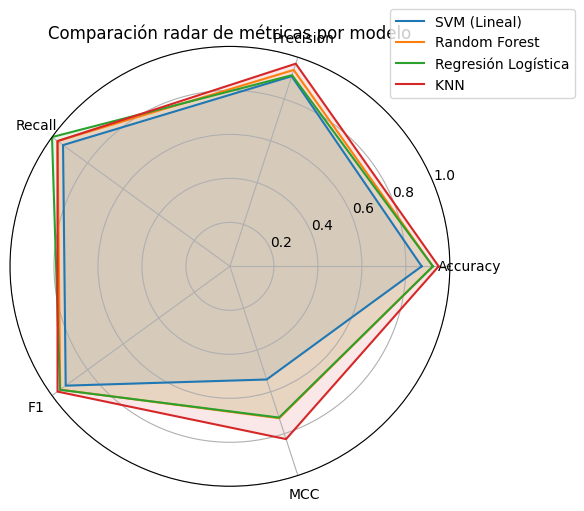

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Prepara los labels y valores
labels = ['Accuracy','Precision','Recall','F1','MCC']
num_vars = len(labels)

# Ángulos para cada eje
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # cerrar el círculo

fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))

for i, row in df_res.iterrows():
    values = row[labels].tolist()
    values += values[:1]  # cerrar la línea
    ax.plot(angles, values, label=row['Modelo'])
    ax.fill(angles, values, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_ylim(0,1)
plt.title("Comparación radar de métricas por modelo")
plt.legend(loc='upper right', bbox_to_anchor=(1.3,1.1))
plt.tight_layout()
plt.show()


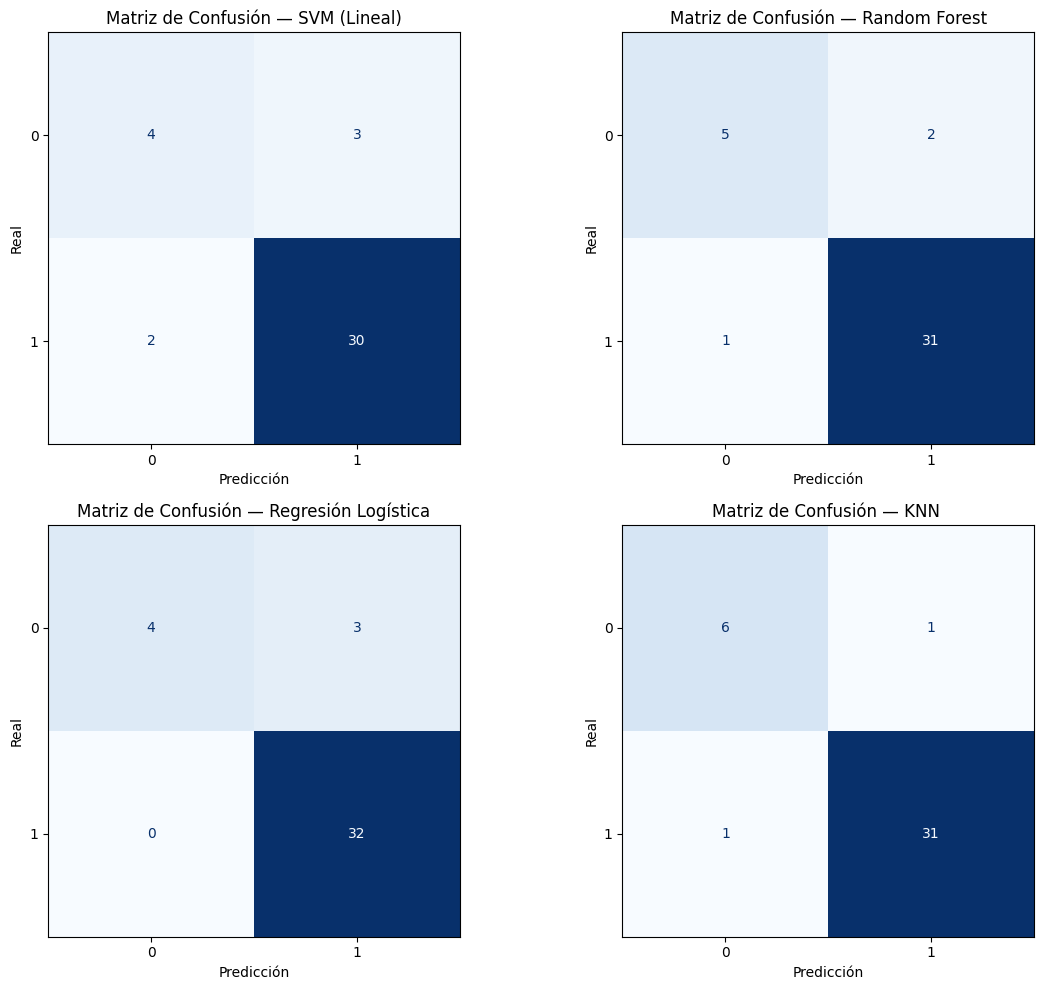

In [26]:
# Bloque Adicional: Gráficos de Matrices de Confusión para los 4 modelos
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Prepara un grid 2×2
fig, axes = plt.subplots(2, 2, figsize=(12,10))
axes = axes.flatten()

for ax, nombre in zip(axes, modelos.keys()):
    y_pred = predicciones[nombre]
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=[0, 1])
    disp.plot(ax=ax, cmap='Blues', colorbar=False)
    ax.set_title(f"Matriz de Confusión — {nombre}")
    ax.set_xlabel("Predicción")
    ax.set_ylabel("Real")

plt.tight_layout()
plt.show()


PRUEBA ESTADISTICA MCC
El Coeficiente de Correlación de Matthews (MCC) es una métrica de rendimiento para tareas de clasificación binaria que tiene en cuenta los cuatro componentes de la matriz de confusión:

TP (verdaderos positivos)

TN (verdaderos negativos)

FP (falsos positivos)

FN (falsos negativos)

,Modelo,MCC
0,SVM (Lineal),0.541
1,Random Forest,0.652
2,Regresión Logística,0.723
3,KNN,0.826


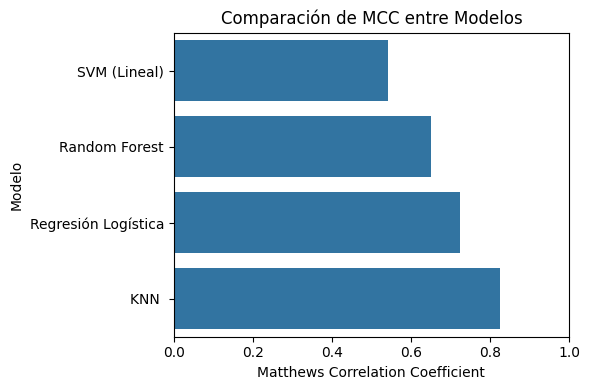

In [32]:
mcc_results = []
for nombre, y_pred in predicciones.items():
    mcc = matthews_corrcoef(y_test, y_pred)
    mcc_results.append({"Modelo": nombre, "MCC": round(mcc, 3)})

df_mcc = pd.DataFrame(mcc_results)

# 2) Mostrar tabla
from IPython.display import display
display(df_mcc)

# 3) Gráfico de barras horizontal
plt.figure(figsize=(6,4))
sns.barplot(data=df_mcc, x="MCC", y="Modelo", orient="h")
plt.title("Comparación de MCC entre Modelos")
plt.xlim(0,1)
plt.xlabel("Matthews Correlation Coefficient")
plt.tight_layout()
plt.show()

AHORA TRABAJAMOS EN EL MODELO ESCOGIDO KNN

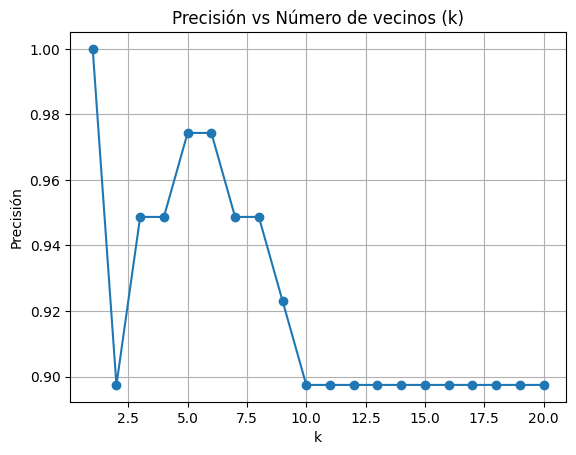

In [33]:
import matplotlib.pyplot as plt

scores = []
k_range = range(1, 21)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    scores.append(knn.score(X_test_scaled, y_test))

# Gráfico
plt.plot(k_range, scores, marker='o')
plt.title("Precisión vs Número de vecinos (k)")
plt.xlabel("k")
plt.ylabel("Precisión")
plt.grid()
plt.show()


SE ESCOGE PARA KNN 5 en numeros de vecinos

📊 Reporte de Clasificación para KNN (k=5):


,precision,recall,f1-score,support
0,1.000,0.857,0.923,7.000
1,0.970,1.000,0.985,32.000
accuracy,0.974,0.974,0.974,0.974
macro avg,0.985,0.929,0.954,39.000
weighted avg,0.975,0.974,0.974,39.000


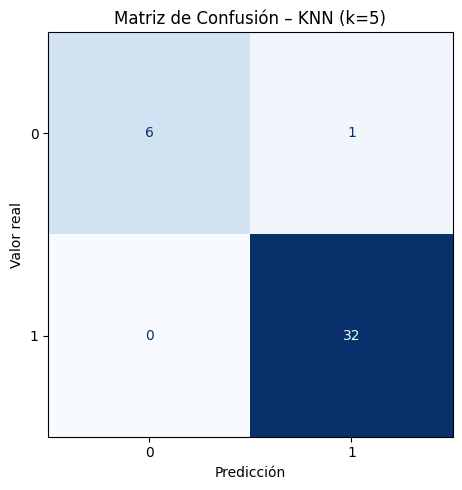

In [40]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from IPython.display import display

# — Supuestos:
#    • X_train_scaled, y_train, X_test_scaled, y_test ya definidos

# 1) Entrenar KNN con k=5
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train_scaled, y_train)

# 2) Predecir en test
y_pred_knn5 = knn5.predict(X_test_scaled)

# 3) Reporte de clasificación en formato tabla
report_dict = classification_report(y_test, y_pred_knn5, output_dict=True)
df_report = pd.DataFrame(report_dict).T.round(3)
df_report = df_report.rename(index={
    "accuracy": "accuracy",
    "macro avg": "macro avg",
    "weighted avg": "weighted avg"
})

print("📊 Reporte de Clasificación para KNN (k=5):")
display(df_report)

# 4) Matriz de confusión
cm = confusion_matrix(y_test, y_pred_knn5)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn5.classes_)

fig, ax = plt.subplots(figsize=(6,5))
disp.plot(ax=ax, cmap='Blues', colorbar=False)
ax.set_title("Matriz de Confusión – KNN (k=5)")
ax.set_xlabel("Predicción")
ax.set_ylabel("Valor real")
plt.tight_layout()
plt.show()


Prueba estadistica validacion cruzada + prueba pareada en las metricas

▶️ Accuracy por fold:


,KNN (k=5),SVM (Lineal),Random Forest,Regresión Logística
Fold1,0.923,0.897,0.974,0.897
Fold2,0.897,0.923,0.949,0.897
Fold3,0.744,0.846,0.949,0.846
Fold4,0.821,0.821,0.846,0.795
Fold5,0.846,0.795,0.795,0.795


▶️ MCC por fold:


,KNN (k=5),SVM (Lineal),Random Forest,Regresión Logística
Fold1,0.793,0.700,0.927,0.695
Fold2,0.711,0.777,0.856,0.711
Fold3,0.283,0.597,0.866,0.597
Fold4,0.477,0.492,0.576,0.396
Fold5,0.574,0.401,0.429,0.401


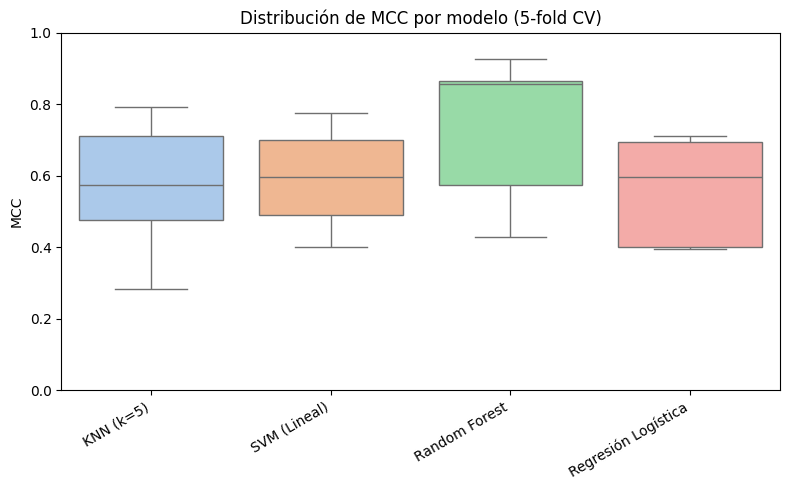

--- KNN vs SVM (Lineal) ---
 Paired t-test:    t=-0.30, p=0.777
 Wilcoxon test:    W=7.00, p=1.000

--- KNN vs Random Forest ---
 Paired t-test:    t=-1.38, p=0.238
 Wilcoxon test:    W=4.00, p=0.438

--- KNN vs Regresión Logística ---
 Paired t-test:    t=0.09, p=0.930
 Wilcoxon test:    W=4.00, p=0.875



In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors   import KNeighborsClassifier
from sklearn.svm         import SVC
from sklearn.ensemble    import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics     import accuracy_score, matthews_corrcoef
from scipy.stats         import ttest_rel, wilcoxon

# 1) Define tus datos y modelos
X = data[vars_sel]     # las columnas que quieras usar
y = data['status']

models = [
    ("KNN (k=5)",        KNeighborsClassifier(n_neighbors=5)),
    ("SVM (Lineal)",     SVC(kernel='linear')),
    ("Random Forest",    RandomForestClassifier()),
    ("Regresión Logística", LogisticRegression(max_iter=1000))
]

# 2) Stratified K-Fold con 5 folds
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 3) Arrays para guardar scores
scores_acc = {name: [] for name,_ in models}
scores_mcc = {name: [] for name,_ in models}

# 4) Loop CV
for train_idx, test_idx in cv.split(X, y):
    X_tr, X_te = X.iloc[train_idx], X.iloc[test_idx]
    y_tr, y_te = y.iloc[train_idx], y.iloc[test_idx]
    for name, model in models:
        model.fit(X_tr, y_tr)
        y_pred = model.predict(X_te)
        # guarda Accuracy y MCC
        scores_acc[name].append(accuracy_score(y_te, y_pred))
        scores_mcc[name].append(matthews_corrcoef(y_te, y_pred))

# 5) Montar DataFrame de resultados por fold
df_acc = pd.DataFrame(scores_acc, index=[f"Fold{i+1}" for i in range(5)])
df_mcc = pd.DataFrame(scores_mcc, index=[f"Fold{i+1}" for i in range(5)])

print("▶️ Accuracy por fold:")
display(df_acc.round(3))
print("▶️ MCC por fold:")
display(df_mcc.round(3))

# 6) Boxplot comparativo (MCC)
plt.figure(figsize=(8,5))
sns.boxplot(data=df_mcc, palette="pastel")
plt.title("Distribución de MCC por modelo (5-fold CV)")
plt.ylabel("MCC")
plt.xticks(rotation=30, ha="right")
plt.ylim(0,1)
plt.tight_layout()
plt.show()

# 7) Pruebas pareadas: KNN (k=5) vs cada otro modelo, sobre MCC
knn_scores = df_mcc["KNN (k=5)"]
for other in df_mcc.columns:
    if other == "KNN (k=5)": continue
    t_stat, p_t    = ttest_rel(knn_scores, df_mcc[other])
    w_stat, p_w    = wilcoxon(knn_scores, df_mcc[other])
    print(f"--- KNN vs {other} ---")
    print(f" Paired t-test:    t={t_stat:.2f}, p={p_t:.3f}")
    print(f" Wilcoxon test:    W={w_stat:.2f}, p={p_w:.3f}\n")



In [41]:
import joblib

# Guarda el escalador
joblib.dump(scaler, 'scaler.pkl')

# Guarda el modelo KNN entrenado (k=5)
joblib.dump(knn5, 'knn5_model.pkl')

print("✅ Escalador y modelo guardados en 'scaler.pkl' y 'knn5_model.pkl'")



✅ Escalador y modelo guardados en 'scaler.pkl' y 'knn5_model.pkl'


In [45]:
import pandas as pd
import joblib
from IPython.display import display

# 1) Carga el modelo y el escalador (ajusta los nombres si tus archivos difieren)
knn5   = joblib.load('knn5_model.pkl')
scaler = joblib.load('scaler.pkl')

# 2) Define las 14 features en el mismo orden que entrenaste
FEATURES = [
    'spread1', 'PPE', 'spread2',
    'MDVP:Fo(Hz)', 'MDVP:Flo(Hz)',
    'MDVP:Shimmer', 'MDVP:APQ',
    'HNR', 'Shimmer:APQ5',
    'MDVP:Shimmer(dB)', 'Shimmer:APQ3',
    'Shimmer:DDA', 'MDVP:Jitter(Abs)', 'RPDE'
]

# 3) Define tus dos casos de prueba
no_parkinson = {
    'spread1':           -7.348300,
    'PPE':                0.085569,
    'spread2':            0.177551,
    'MDVP:Fo(Hz)':       197.07600,
    'MDVP:Flo(Hz)':      192.05500,
    'MDVP:Shimmer':       0.01098,
    'MDVP:APQ':           0.00802,
    'HNR':               26.77500,
    'Shimmer:APQ5':       0.00680,
    'MDVP:Shimmer(dB)':   0.09700,
    'Shimmer:APQ3':       0.00563,
    'Shimmer:DDA':        0.01689,
    'MDVP:Jitter(Abs)':   0.00001,
    'RPDE':               0.422229,
}
con_parkinson = {
    'spread1':           -4.476755,
    'PPE':                0.326197,
    'spread2':            0.262633,
    'MDVP:Fo(Hz)':       116.87900,
    'MDVP:Flo(Hz)':      108.15300,
    'MDVP:Shimmer':       0.02645,
    'MDVP:APQ':           0.02137,
    'HNR':               22.60300,
    'Shimmer:APQ5':       0.01625,
    'MDVP:Shimmer(dB)':   0.26500,
    'Shimmer:APQ3':       0.01394,
    'Shimmer:DDA':        0.04183,
    'MDVP:Jitter(Abs)':   0.00007,
    'RPDE':               0.540049,
}

# 4) Monta el DataFrame de prueba
df_test = pd.DataFrame([no_parkinson, con_parkinson],
                       index=['No_Parkinson', 'Con_Parkinson'])

# 5) Muestra los valores de entrada
print("=== Valores de Entrada ===")
display(df_test)

# 6) Escala y predice
X_scaled = scaler.transform(df_test[FEATURES])
preds    = knn5.predict(X_scaled)
probas   = knn5.predict_proba(X_scaled)

# 7) Construye el DataFrame de resultados
results = pd.DataFrame({
    'Prediction':     ['Parkinson' if p == 1 else 'Healthy' for p in preds],
    'Prob_Healthy':   probas[:, 0],
    'Prob_Parkinson': probas[:, 1],
}, index=df_test.index)

# 8) Muestra los resultados
print("\n=== Resultados de Predicción ===")
display(results)



=== Valores de Entrada ===


,spread1,PPE,spread2,MDVP:Fo(Hz),MDVP:Flo(Hz),MDVP:Shimmer,MDVP:APQ,HNR,Shimmer:APQ5,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:DDA,MDVP:Jitter(Abs),RPDE
No_Parkinson,-7.348300,0.085569,0.177551,197.076,192.055,0.01098,0.00802,26.775,0.00680,0.097,0.00563,0.01689,0.00001,0.422229
Con_Parkinson,-4.476755,0.326197,0.262633,116.879,108.153,0.02645,0.02137,22.603,0.01625,0.265,0.01394,0.04183,0.00007,0.540049



=== Resultados de Predicción ===


,Prediction,Prob_Healthy,Prob_Parkinson
No_Parkinson,Healthy,0.6,0.4
Con_Parkinson,Parkinson,0.0,1.0


In [ ]:
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    matthews_corrcoef, classification_report
)
from statsmodels.stats.contingency_tables import mcnemar

# Suponiendo que ya tienes:
#   data, X_train_scaled, X_test_scaled, y_train, y_test
#   modelos (dict), predicciones (dict), df_res (DataFrame)
#   features (lista de nombres de columnas para distribuciones)

with PdfPages('reporte_completo_modelos.pdf') as pdf:

    # 1) Heatmap de correlaciones
    fig, ax = plt.subplots(figsize=(10,8))
    corr = data.corr()
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", ax=ax)
    ax.set_title("Mapa de Calor de Correlaciones")
    pdf.savefig(fig); plt.close(fig)

    # 2) Distribución de la variable objetivo
    fig, ax = plt.subplots(figsize=(6,4))
    sns.countplot(data=data, x='status', ax=ax)
    ax.set_title("Distribución de pacientes (0 = sano, 1 = Parkinson)")
    pdf.savefig(fig); plt.close(fig)

    # 3) Distribuciones por feature
    for feat in features:
        fig, ax = plt.subplots(figsize=(6,3))
        sns.histplot(data=data, x=feat, hue="status", kde=True, ax=ax)
        ax.set_title(f"Distribución de {feat}")
        pdf.savefig(fig); plt.close(fig)

    # 4) Tabla resumen de métricas (Accuracy, Precision, Recall, F1, MCC)
    fig, ax = plt.subplots(figsize=(8,2))
    ax.axis('off')
    table = ax.table(
        cellText=df_res.values,
        colLabels=df_res.columns,
        cellLoc='center',
        loc='center'
    )
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    ax.set_title("Resumen de Métricas por Modelo")
    pdf.savefig(fig); plt.close(fig)

    # 5) Matrices de confusión de cada modelo
    for nombre, y_pred in predicciones.items():
        fig, ax = plt.subplots(figsize=(5,4))
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(cm, display_labels=[0,1])
        disp.plot(ax=ax, cmap='Blues', colorbar=False)
        ax.set_title(f"Matriz de Confusión – {nombre}")
        pdf.savefig(fig); plt.close(fig)

    # 6) Prueba de McNemar: comparar KNN vs cada otro modelo
    knn_pred = predicciones["KNN"]
    for otro in [m for m in predicciones if m!="KNN"]:
        y_otro = predicciones[otro]
        b = np.sum((y_test == knn_pred) & (y_test != y_otro))
        c = np.sum((y_test != knn_pred) & (y_test == y_otro))
        table_m = [[0,b],[c,0]]
        res = mcnemar(table_m, exact=False, correction=True)
        txt = (f"McNemar KNN vs {otro}\n"
               f"  b={b}, c={c}\n"
               f"  χ²={res.statistic:.3f}, p-value={res.pvalue:.3f}")
        fig, ax = plt.subplots(figsize=(6,2))
        ax.axis('off')
        fig.text(0.01, 0.5, txt, family='monospace')
        pdf.savefig(fig); plt.close(fig)

    # 7) Precisión vs k
    scores = []
    k_range = range(1, 21)
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_scaled, y_train)
        scores.append(knn.score(X_test_scaled, y_test))
    fig, ax = plt.subplots(figsize=(6,4))
    ax.plot(k_range, scores, marker='o')
    ax.set_title("Precisión vs Número de Vecinos (k)")
    ax.set_xlabel("k")
    ax.set_ylabel("Precisión")
    pdf.savefig(fig); plt.close(fig)

    # 8) Reporte detallado KNN (k=5)
    knn5 = KNeighborsClassifier(n_neighbors=5)
    knn5.fit(X_train_scaled, y_train)
    y5 = knn5.predict(X_test_scaled)
    rpt = classification_report(y_test, y5)
    mcc5 = matthews_corrcoef(y_test, y5)
    txt2 = "Reporte Clasificación KNN (k=5)\n\n" + rpt + f"\nMCC = {mcc5:.3f}"
    fig, ax = plt.subplots(figsize=(6,4))
    ax.axis('off')
    fig.text(0.01, 0.99, txt2, va='top', family='monospace')
    pdf.savefig(fig); plt.close(fig)

print("✅ Reporte guardado en 'reporte_completo_modelos.pdf'")


✅ Reporte guardado en 'reporte_completo_modelos.pdf'
